In [11]:
# Pandas for managing datasets
import pandas as pd

In [12]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

In [13]:
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

In [14]:

# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Scatter Plot

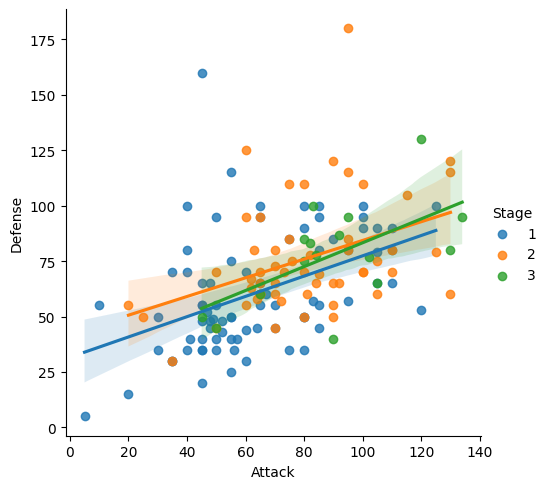

In [15]:

# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=True, # No regression line
           hue='Stage')   # Color by evolution stage

Box Plots

<Axes: >

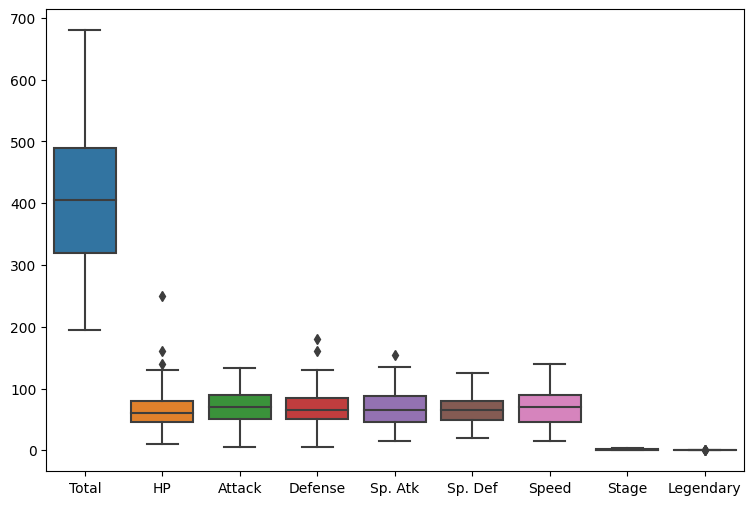

In [16]:
# Boxplot
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=df)

<Axes: >

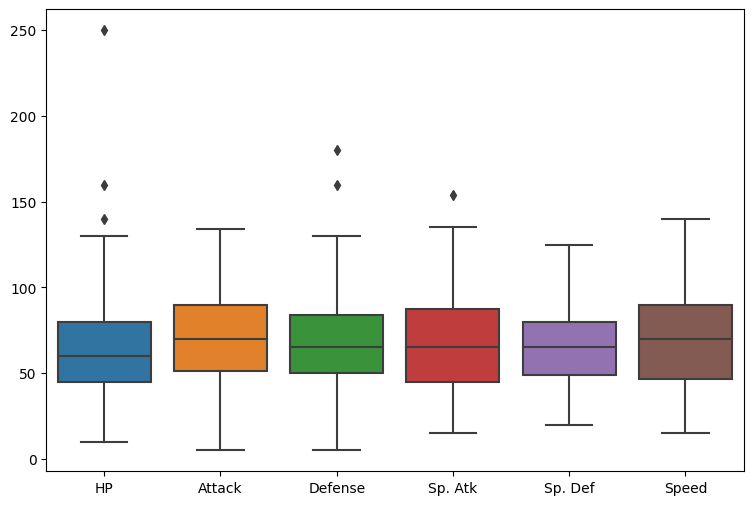

In [17]:

# Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_df)

Violin Plot

<Axes: xlabel='Type 1', ylabel='Attack'>

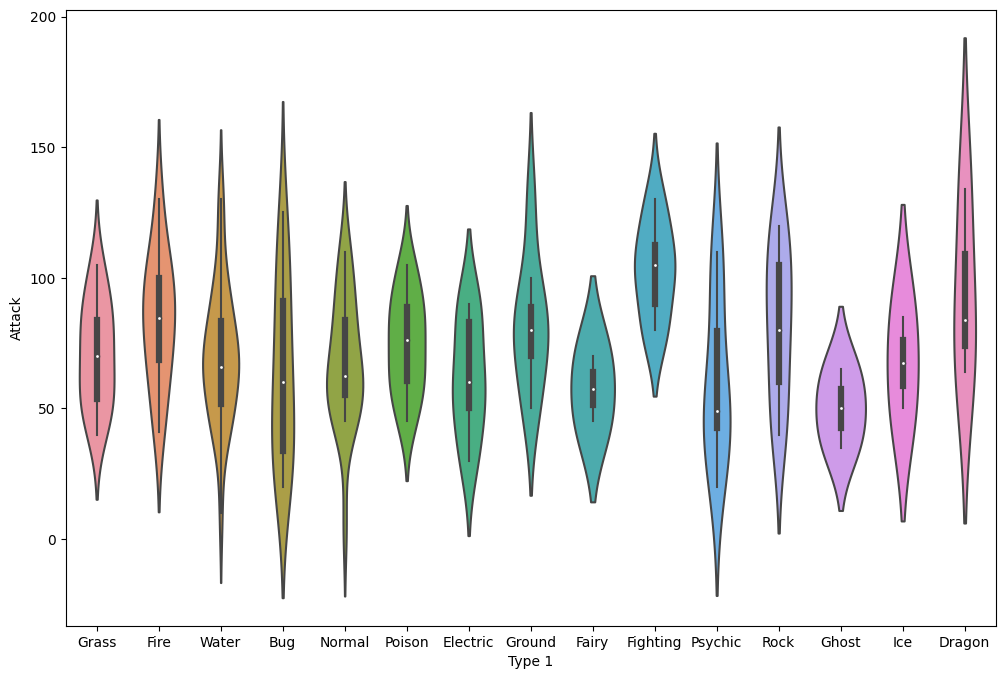

In [18]:
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df)

Heat Map

In [19]:
# Calculate correlations
corr = stats_df.corr()

corr

<ipython-input-19-deaf804801bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stats_df.corr()


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


<Axes: >

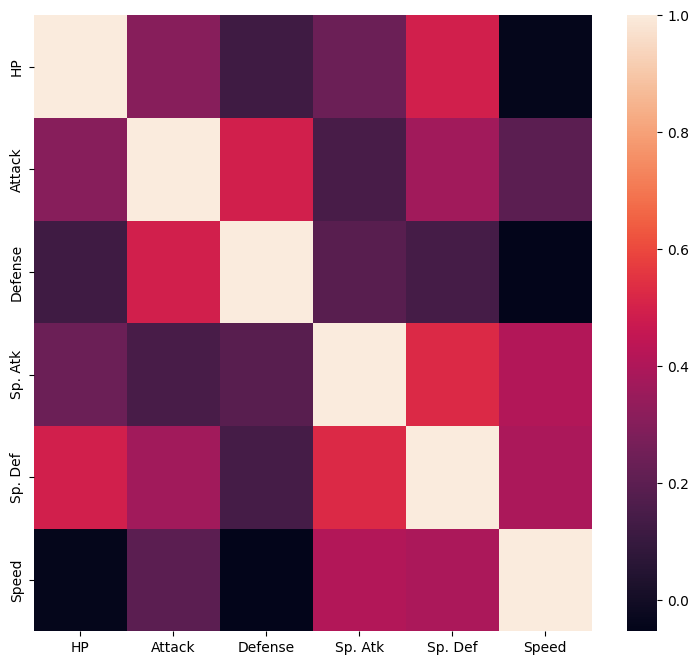

In [20]:
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

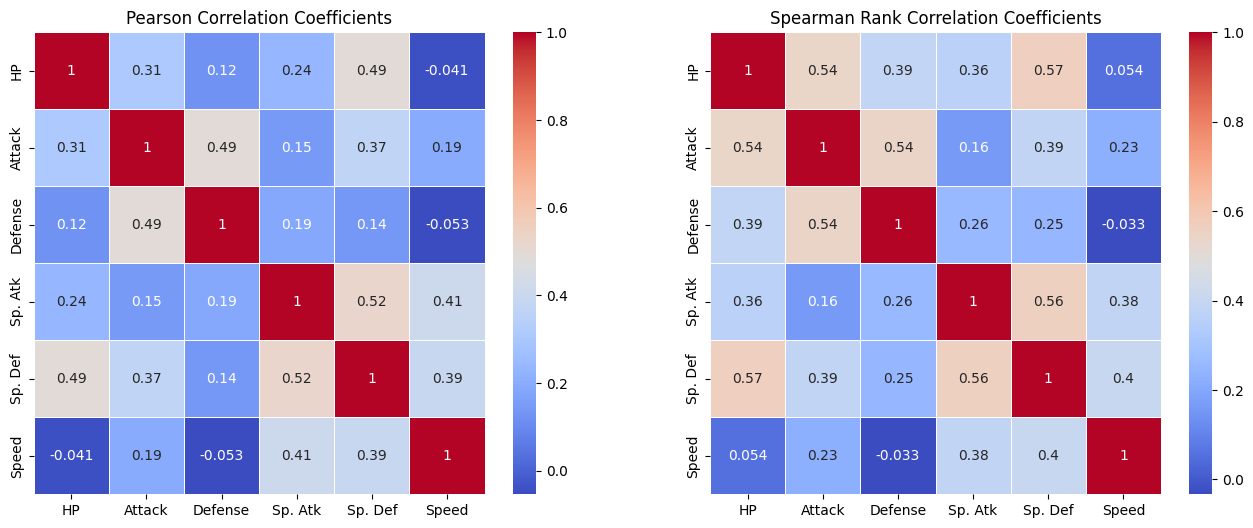

In [21]:
# Filter the DataFrame to only include the desired columns
selected_features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stats_df = df[selected_features]

# Calculate the Pearson correlation coefficients
pearson_corr = stats_df.corr(method='pearson')

# Calculate the Spearman rank correlation coefficients
spearman_corr = stats_df.corr(method='spearman')

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Pearson Correlation Coefficients')

# Plot the Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Spearman Rank Correlation Coefficients')

plt.show()

https://elitedatascience.com/python-seaborn-tutorial#step-10